# Voting classifier and feature selection using MLxtend on Pima Indian diabetes dataset 

In [121]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
%matplotlib inline
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection

In [122]:
df = pd.read_csv('diabetes.csv')

In [144]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [124]:
X = df.drop('Outcome', axis=1).copy()
y = df['Outcome'].copy()

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [126]:
df.shape

(768, 9)

## Voting classifier

Will use Logistic Regression, Random Forest ensemble and Naive Bayes in a hard voting classifier 

In [127]:
voting_classifier = VotingClassifier(
                    estimators=[
                        ('lr', LogisticRegression(C=5.0, dual=False, penalty="l2")),
                        ('rf', RandomForestClassifier()),
                        ('nb', BernoulliNB(alpha=1.0, fit_prior=True))], 
                        voting= 'hard')

In [128]:
voting_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=5.0)),
                             ('rf', RandomForestClassifier()),
                             ('nb', BernoulliNB())])

In [129]:
voting_classifier.score(X_test, y_test)

0.7662337662337663

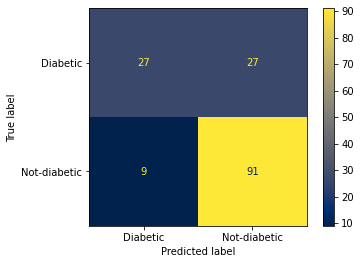

In [130]:
plot_confusion_matrix(voting_classifier, X_test, y_test, labels=[1,0], display_labels=["Diabetic", "Not-diabetic"], cmap='cividis')

In [131]:
y_pred = voting_classifier.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred, labels=[1,0])
TP = confusion_mat[0,0]; TN=confusion_mat[1,1]; FN = confusion_mat[1,0]; FP = confusion_mat[0,1]
confusion_mat

array([[27, 27],
       [ 9, 91]], dtype=int64)

In [132]:
print(classification_report(y_test, y_pred, labels=[1,0]))

              precision    recall  f1-score   support

           1       0.75      0.50      0.60        54
           0       0.77      0.91      0.83       100

    accuracy                           0.77       154
   macro avg       0.76      0.71      0.72       154
weighted avg       0.76      0.77      0.75       154



In [133]:
sensitivity = TP/(TP+FN)
print(f"{round(sensitivity*100,2)}% of the cases where the patient was diabetic and was correctly identified as diabetic")

75.0% of the cases where the patient was diabetic and was correctly identified as diabetic


In [134]:
specificity = TN/(TN+FP)
print(f"{round(specificity*100,2)}% of the cases without diabetes that were correctly identified")

77.12% of the cases without diabetes that were correctly identified


## Feature slection using MLxtend
source:https://www.youtube.com/watch?v=AvVEFcxDSts&t=533s&ab_channel=AIHackByAK

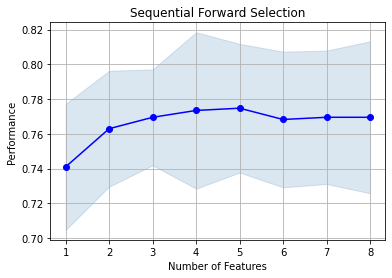

In [135]:
sfs = SFS(voting_classifier, k_features=8, forward=True, scoring='accuracy', cv=10)
sfs.fit(X, y)
fig1 = plot_sequential_feature_selection(sfs.get_metric_dict())
plt.grid()
plt.title('Sequential Forward Selection')
plt.show()

Accuracy decreases after 5 features.  

In [146]:
sfs2 = SFS(voting_classifier, k_features=5, forward=True, scoring='accuracy', cv=10)
sfs2.fit(X,y)
sfs2.k_feature_names_

('Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age')

In [147]:
featured_X = df[list(sfs2.k_feature_names_)]

In [148]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(featured_X,y, test_size=0.2)

In [149]:
voting_classifier.fit(X_train2, y_train2)
voting_classifier.score(X_test2, y_test2)

0.7987012987012987

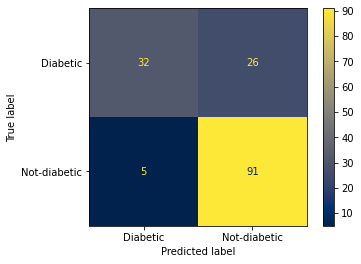

In [150]:
plot_confusion_matrix(voting_classifier, X_test2, y_test2, labels=[1,0], display_labels=["Diabetic", "Not-diabetic"], cmap='cividis')

In [151]:
y_pred2 = voting_classifier.predict(X_test2)
confusion_mat2 = confusion_matrix(y_test2, y_pred2, labels=[1,0])
TP = confusion_mat2[0,0]; TN=confusion_mat2[1,1]; FN = confusion_mat2[1,0]; FP = confusion_mat2[0,1]
confusion_mat2

array([[32, 26],
       [ 5, 91]], dtype=int64)

In [152]:
sensitivity = TP/(TP+FN)
print(f"{round(sensitivity*100,2)}% of the cases where the patient was diabetic and was correctly identified as diabetic")

86.49% of the cases where the patient was diabetic and was correctly identified as diabetic


In [153]:
specificity = TN/(TN+FP)
print(f"{round(specificity*100,2)}% of the cases without diabetes that were correctly identified")

77.78% of the cases without diabetes that were correctly identified
